# Del Paradigma Heurístico al Aprendizaje Automático - Clasificación de Reseñas con SVM

En la clase anterior, exploramos el **paradigma heurístico** usando expresiones regulares (regex) para analizar texto. Vimos que es muy potente, pero también que tiene limitaciones, especialmente cuando los patrones son complejos o ambiguos.

Hoy, daremos un salto hacia el **paradigma de aprendizaje automático (Machine Learning)**. En lugar de escribir reglas a mano, vamos a "enseñarle" a una máquina a aprender esas reglas a partir de datos.

**Objetivo de hoy:**
Construiremos un clasificador de sentimientos (positivo o negativo) para reseñas de películas de IMDb utilizando un algoritmo elegante y potente: la **Máquina de Soporte Vectorial (SVM)**.

---

### **Índice de la Clase**

1.  **Introducción Teórica: ¿Qué es una Máquina de Soporte Vectorial (SVM)?**
    * La intuición: Encontrar el "mejor" separador.
    * Conceptos clave: Hiperplano, márgenes y vectores de soporte.
    * ¿Por qué SVM para texto? El truco del kernel.
2.  **Preparación del Entorno**
    * Instalación de librerías y configuración de Kaggle.
3.  **Carga y Exploración de Datos (EDA)**
    * Descargando nuestro dataset de IMDb.
    * Una primera mirada a las reseñas.
4.  **Preprocesamiento de Texto**
    * Limpieza: Eliminando ruido (HTML, puntuación, etc.).
    * Vectorización: ¡Convirtiendo palabras en números! (TF-IDF).
5.  **Entrenamiento del Modelo SVM**
    * Dividiendo los datos: Entrenamiento y prueba.
    * Construyendo y entrenando nuestro clasificador.
6.  **Evaluación del Modelo**
    * ¿Qué tan bueno es nuestro clasificador? Métricas de rendimiento.
    * Matriz de confusión: ¿En qué se equivoca?
7.  **Desafío Final**
    * ¡Prueba el clasificador con tus propias reseñas!

## 1. Introducción Teórica: ¿Qué es una Máquina de Soporte Vectorial (SVM)?

Imagina que tienes un gráfico con puntos de dos colores diferentes (por ejemplo, reseñas positivas ⚫ y negativas ⚪) y quieres trazar una línea para separarlos.



Seguramente podrías trazar muchas líneas que cumplan este objetivo, ¿verdad?

La pregunta clave que se hace una SVM es: **¿Cuál de todas las líneas posibles es la MEJOR?**

La intuición de SVM es que la mejor línea (o **hiperplano**, en más de dos dimensiones) es aquella que tiene la **máxima distancia** con los puntos más cercanos de cada clase. A esta distancia la llamamos **margen**.



**Conceptos Clave:**

* **Hiperplano:** Es la "frontera" de decisión que separa las clases. En 2D es una línea, en 3D es un plano, y en más dimensiones se le llama hiperplano.
* **Márgenes:** Son las "calles" vacías a cada lado del hiperplano. El objetivo de SVM es hacer estas calles lo más anchas posible.
* **Vectores de Soporte (Support Vectors):** Son los puntos de datos que están justo en el borde del margen. Son los puntos más críticos, ya que "soportan" el hiperplano. Si moviéramos uno de estos puntos, el hiperplano también se movería. ¡De ahí viene el nombre del algoritmo!

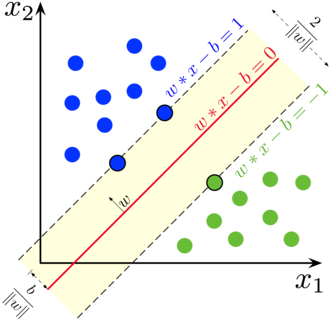

### ¿Y cómo funciona esto con texto? El "Truco del Kernel"

El texto no vive naturalmente en un gráfico 2D. Para usar SVM, primero debemos convertir las palabras en vectores numéricos (lo haremos con una técnica llamada **TF-IDF**). Una vez que tenemos los vectores, cada reseña se convierte en un punto en un espacio de miles de dimensiones.

A veces, los datos no se pueden separar con una línea recta. Aquí es donde entra la magia del **kernel**. El "truco del kernel" (Kernel Trick) permite a SVM proyectar los datos a una dimensión superior donde sí sean linealmente separables, sin tener que hacer el cálculo computacionalmente costoso. Es como si lanzaras los puntos al aire para poder pasar una hoja de papel (un plano) entre ellos.

Para texto, el **kernel lineal** suele funcionar sorprendentemente bien y es computacionalmente eficiente.
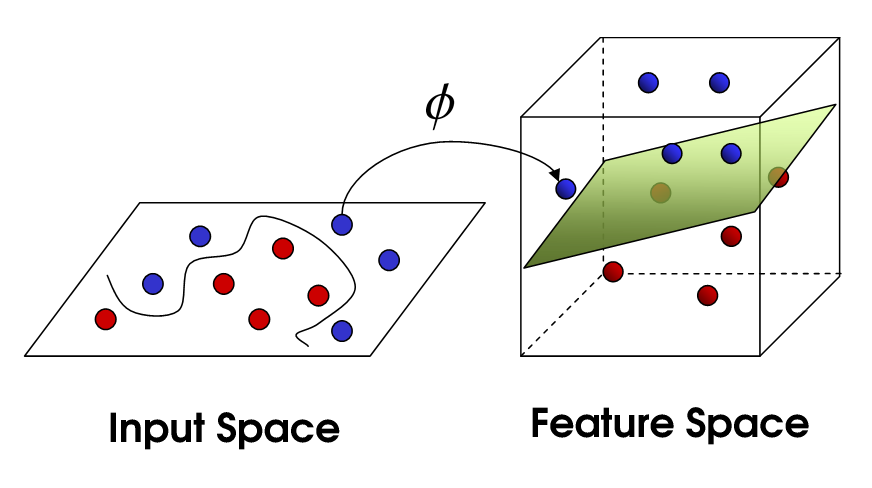

## 2. Preparación del Entorno

Primero, necesitamos instalar la librería de Kaggle para descargar los datos directamente.

In [ ]:
# Instalamos la librería de Kaggle
!pip install kaggle -q

Ahora, necesitamos subir nuestro archivo `kaggle.json` para autenticarnos.

**Instrucciones para los alumnos:**
1.  Ve a tu perfil de Kaggle (`https://www.kaggle.com/<tu-usuario>/account`).
2.  Haz clic en "Create New API Token". Se descargará un archivo llamado `kaggle.json`.
3.  Sube ese archivo usando el siguiente código.

In [ ]:
from google.colab import files
import os

# Pedimos que se suba el archivo kaggle.json
if not os.path.exists('/root/.kaggle/kaggle.json'):
    uploaded = files.upload()
    for fn in uploaded.keys():
        # Creamos el directorio y movemos el archivo
        !mkdir -p ~/.kaggle
        !mv {fn} ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
    print("¡Archivo kaggle.json cargado con éxito!")
else:
    print("El archivo kaggle.json ya existe.")

El archivo kaggle.json ya existe.


## 3. Carga y Exploración de Datos (EDA)

Vamos a descargar el famoso dataset "IMDB Dataset of 50K Movie Reviews".

In [ ]:
# Descargamos el dataset desde Kaggle y lo descomprimimos
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -q
!unzip -q imdb-dataset-of-50k-movie-reviews.zip

print("Dataset descargado y descomprimido.")

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
Dataset descargado y descomprimido.


Ahora, carguemos los datos en un DataFrame de `pandas`, una herramienta fundamental para la manipulación de datos en Python.

In [ ]:
import pandas as pd

# Cargamos el archivo CSV en un DataFrame
df = pd.read_csv('IMDB Dataset.csv')

# Veamos cómo lucen nuestros datos
print("Tamaño del dataset:", df.shape)
print("\nPrimeras 5 filas:")
df.head()

Tamaño del dataset: (50000, 2)

Primeras 5 filas:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Veamos cuántas reseñas positivas y negativas tenemos. ¡Un buen balance es clave!

In [ ]:
# Contamos los valores de la columna 'sentiment'
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


Como podemos ver, el dataset está perfectamente balanceado: 25,000 reseñas positivas y 25,000 negativas.

Ahora, convirtamos las etiquetas de texto ("positive", "negative") a números (1, 0) para que nuestro modelo pueda entenderlas.

In [ ]:
# Mapeamos 'positive' a 1 y 'negative' a 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## 4. Preprocesamiento de Texto

El texto real es "sucio". Contiene etiquetas HTML, signos de puntuación, mayúsculas/minúsculas y palabras comunes (como "y", "el", "un") que no aportan mucho significado.

Crearemos una función de limpieza simple usando regex, ¡nuestro viejo amigo de la clase pasada!

In [ ]:
import re

def limpiar_texto(texto):
    """
    Función para limpiar el texto de las reseñas.
    - Elimina etiquetas HTML.
    - Se queda solo con caracteres alfabéticos.
    - Convierte todo a minúsculas.
    """
    # Eliminar etiquetas HTML
    texto = re.sub(r'<.*?>', '', texto)
    # Eliminar caracteres no alfabéticos
    texto = re.sub(r'[^a-zA-Z\s]', '', texto, re.I|re.A)
    # Convertir a minúsculas y quitar espacios extra
    texto = texto.lower().strip()
    return texto

# Aplicamos la función de limpieza a toda la columna 'review'
# ¡Esto puede tardar un par de minutos!
df['review_limpia'] = df['review'].apply(limpiar_texto)

print("Texto limpiado. Veamos un ejemplo:")
print("\nOriginal:\n")
df['review'][0]

Texto limpiado. Veamos un ejemplo:

Original:



"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
print("\nLimpia:\n")
df['review_limpia'][0]


Limpia:



'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

### Vectorización con TF-IDF

Ahora viene el paso más importante: convertir el texto en números. Usaremos la técnica **TF-IDF** (*Term Frequency-Inverse Document Frequency*).

* **TF (Frecuencia del Término):** Mide qué tan frecuente es una palabra en un documento. Una palabra que aparece muchas veces tiene un valor TF alto.
* **IDF (Frecuencia Inversa del Documento):** Mide qué tan "rara" o "especial" es una palabra en todo el conjunto de documentos. Palabras muy comunes como "the" o "a" aparecen en casi todos los documentos, por lo que tendrán un IDF bajo. Palabras como "spielberg" o "sci-fi" son más específicas y tendrán un IDF alto.

El valor TF-IDF es simplemente la multiplicación de ambos. Esto le da más importancia a las palabras que son frecuentes en una reseña específica pero raras en el resto.
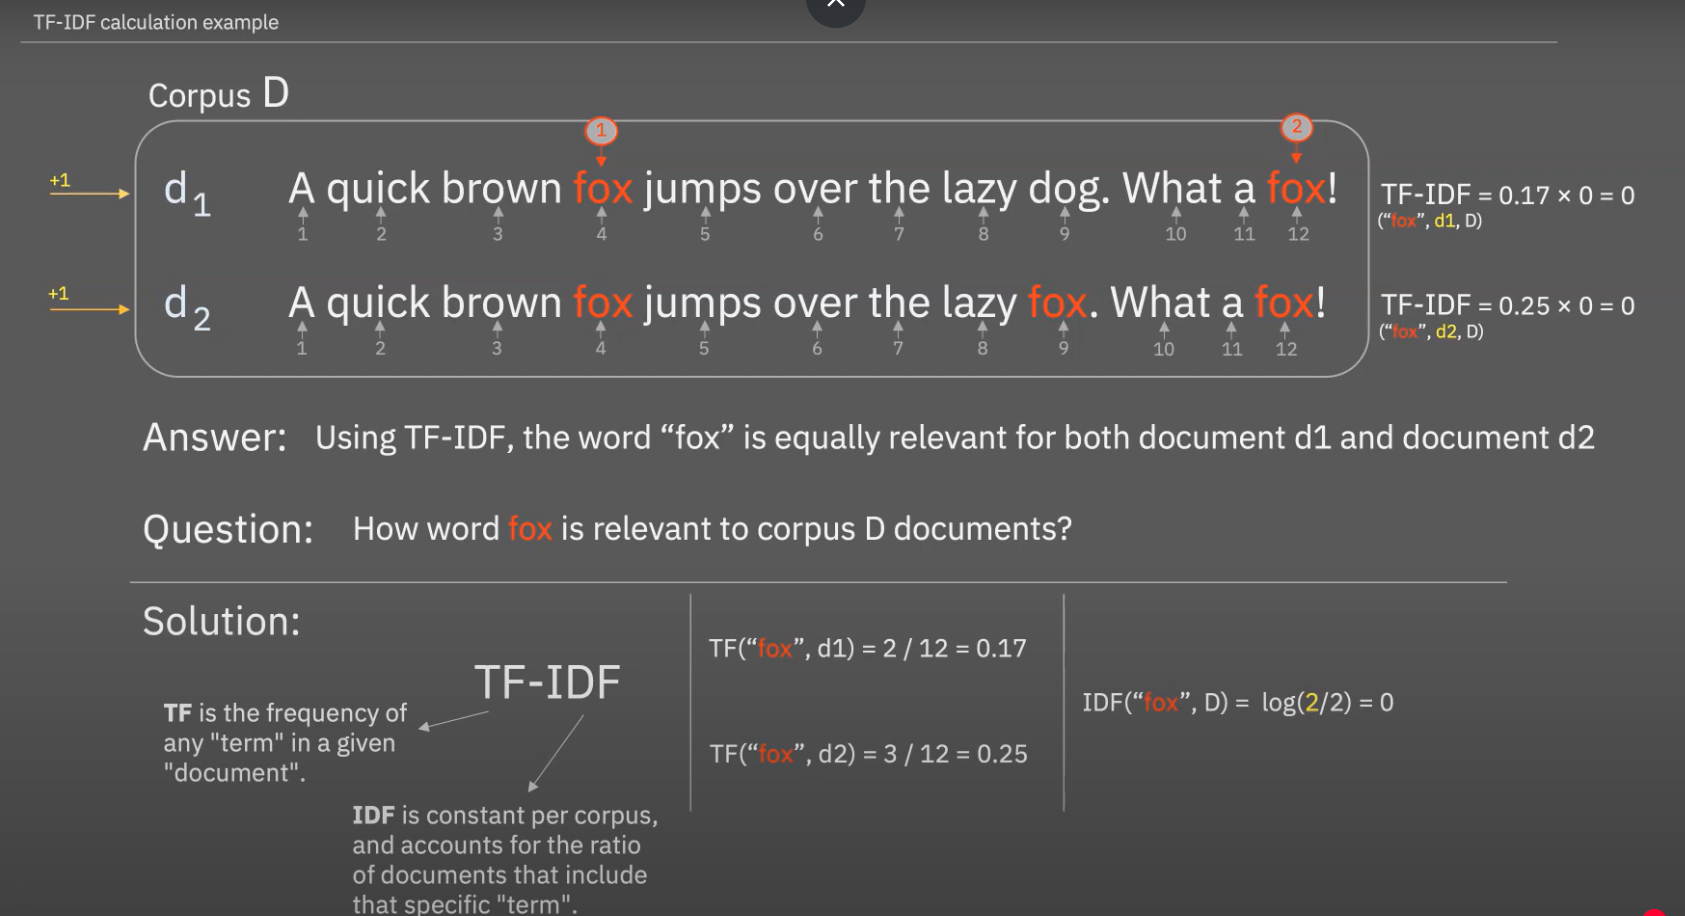

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializamos el vectorizador TF-IDF
# - stop_words='english': para eliminar palabras comunes en inglés (the, a, is...)
# - max_features=5000: para quedarnos solo con las 5000 palabras más importantes y evitar que el modelo sea demasiado complejo
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Aplicamos el vectorizador a nuestras reseñas limpias
X = tfidf_vectorizer.fit_transform(df['review_limpia'])

# La 'y' es nuestra variable objetivo (el sentimiento)
y = df['sentiment']

# Veamos las dimensiones de nuestra matriz de características
print("Dimensiones de la matriz TF-IDF (X):", X.shape)

Dimensiones de la matriz TF-IDF (X): (50000, 5000)


In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 5. Entrenamiento del Modelo SVM

Ahora, la parte divertida. Vamos a dividir nuestros datos en dos conjuntos:
* **Conjunto de entrenamiento (Training set):** Lo usaremos para "enseñarle" al modelo SVM. (80% de los datos)
* **Conjunto de prueba (Test set):** Lo usaremos para evaluar qué tan bien aprendió el modelo, usando datos que nunca ha visto. (20% de los datos)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos los datos
# test_size=0.2 indica que el 20% de los datos serán para prueba
# random_state=42 asegura que la división sea siempre la misma, para que los resultados sean reproducibles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (40000, 5000)
Tamaño del conjunto de prueba: (10000, 5000)


In [ ]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Ahora, importamos, inicializamos y entrenamos nuestro clasificador SVM. Usaremos `LinearSVC`, que es una implementación de SVM optimizada para casos donde el número de muestras es mucho mayor que el número de características, ¡justo como el nuestro!

In [ ]:
from sklearn.svm import LinearSVC

# 1. Creamos una instancia del clasificador SVM
svm_classifier = LinearSVC(random_state=42)

# 2. Entrenamos el clasificador con los datos de entrenamiento
print("Entrenando el modelo SVM... ¡Esto puede tomar un momento!")
svm_classifier.fit(X_train, y_train)
print("¡Modelo entrenado!")

Entrenando el modelo SVM... ¡Esto puede tomar un momento!
¡Modelo entrenado!


## 6. Evaluación del Modelo

El modelo está entrenado, pero... ¿funciona bien? Vamos a usar los datos de prueba (`X_test`) que el modelo nunca ha visto para hacer predicciones y compararlas con las etiquetas reales (`y_test`).

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hacemos predicciones sobre el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Calculamos la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")

# Imprimimos un reporte de clasificación más detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Negativo', 'Positivo']))

Exactitud del modelo: 87.31%

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.88      0.86      0.87      4961
    Positivo       0.87      0.88      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Una exactitud de casi el 90% es ¡excelente! El reporte nos da más detalles:
* **Precision:** De todas las veces que el modelo predijo "Positivo", ¿qué porcentaje acertó?
* **Recall (Sensibilidad):** De todas las reseñas que eran realmente "Positivas", ¿qué porcentaje logró identificar el modelo?
* **F1-Score:** Es una media armónica de Precision y Recall. Es útil para tener una sola métrica que combine ambas.

### Matriz de Confusión

Una de las mejores formas de visualizar el rendimiento de un clasificador es con una **matriz de confusión**.

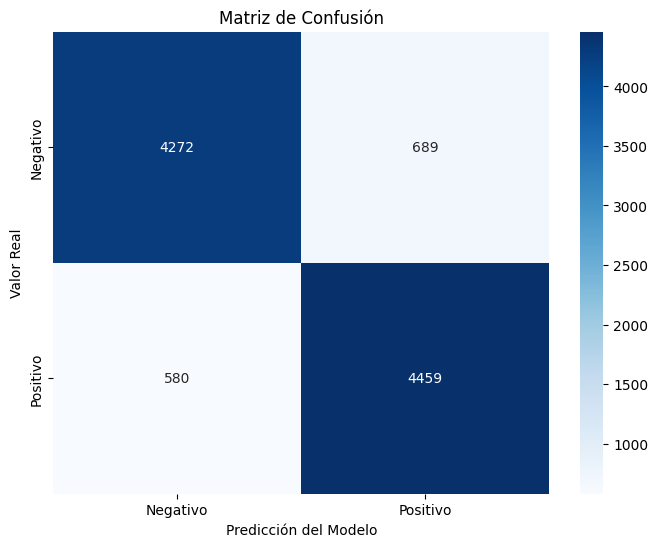

In [ ]:
# Generamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

**¿Cómo leer la matriz?**
* **Esquina superior-izquierda (Verdaderos Negativos):** Número de reseñas negativas que el modelo clasificó correctamente como negativas.
* **Esquina inferior-derecha (Verdaderos Positivos):** Número de reseñas positivas que el modelo clasificó correctamente como positivas.
* **Esquina superior-derecha (Falsos Positivos):** Número de reseñas negativas que el modelo clasificó incorrectamente como positivas.
* **Esquina inferior-izquierda (Falsos Negativos):** Número de reseñas positivas que el modelo clasificó incorrectamente como negativas.

Como vemos, el modelo es muy bueno, pero no es perfecto. ¡Identificar estos errores es clave para mejorar!

In [ ]:
y_test.index

Index([33553,  9427,   199, 12447, 39489, 42724, 10822, 49498,  4144, 36958,
       ...
       29598, 43515, 15832, 37692, 26859, 28567, 25079, 18707, 15200,  5857],
      dtype='int64', length=10000)

In [ ]:
df_resultados = pd.DataFrame({
    'Reseña': df.loc[y_test.index, 'review'],
    'Categoría Real': y_test.map({1: 'Positivo 👍', 0: 'Negativo 👎'}),
    'Predicción del Modelo': pd.Series(y_pred, index=y_test.index).map({1: 'Positivo 👍', 0: 'Negativo 👎'})
})

df_resultados.head(10)

,Reseña,Categoría Real,Predicción del Modelo
33553,I really liked this Summerslam due to the look...,Positivo 👍,Negativo 👎
9427,Not many television shows appeal to quite as m...,Positivo 👍,Positivo 👍
199,The film quickly gets to a major chase scene w...,Negativo 👎,Negativo 👎
12447,Jane Austen would definitely approve of this o...,Positivo 👍,Positivo 👍
39489,Expectations were somewhat high for me when I ...,Negativo 👎,Negativo 👎
42724,I've watched this movie on a fairly regular ba...,Positivo 👍,Positivo 👍
10822,For once a story of hope highlighted over the ...,Positivo 👍,Positivo 👍
49498,"Okay, I didn't get the Purgatory thing the fir...",Positivo 👍,Negativo 👎
4144,I was very disappointed with this series. It h...,Negativo 👎,Negativo 👎
36958,The first 30 minutes of Tinseltown had my fing...,Negativo 👎,Negativo 👎


In [ ]:
df_resultados[df_resultados['Categoría Real'] != df_resultados['Predicción del Modelo']]

,Reseña,Categoría Real,Predicción del Modelo
33553,I really liked this Summerslam due to the look...,Positivo 👍,Negativo 👎
49498,"Okay, I didn't get the Purgatory thing the fir...",Positivo 👍,Negativo 👎
6113,"The production quality, cast, premise, authent...",Positivo 👍,Negativo 👎
33109,Three kids are born during a solar eclipse and...,Positivo 👍,Negativo 👎
14644,Eyeliner was worn nearly 6000 years ago in Egy...,Positivo 👍,Negativo 👎
...,...,...,...
40110,"The film is very complete in what it is, keepi...",Positivo 👍,Negativo 👎
29598,Trekkies is really not a movie about Star Trek...,Negativo 👎,Positivo 👍
15832,Since the start of her career in the 70's and ...,Positivo 👍,Negativo 👎
37692,"First of all, the genre of this movie isn't co...",Negativo 👎,Positivo 👍


## 7. Desafío Final: ¡A Clasificar!

¡Ahora es tu turno! Escribe una reseña (buena o mala) de tu película favorita y veamos cómo la clasifica nuestro modelo.

**Instrucciones:**
1.  Escribe tu reseña en la variable `mi_reseña`.
2.  Ejecuta la celda para ver la predicción.

In [ ]:
# EJERCICIO PARA EL ALUMNO

# Escribe tu propia reseña aquí
# mi_reseña = "This movie was absolutely fantastic! The acting was superb and the plot kept me on the edge of my seat. I would recommend it to everyone."
# mi_reseña = "What a waste of time. The plot was boring and the acting was terrible. I almost fell asleep."
# mi_reseña = "La pelicula estaba mala happy"
mi_reseña = "The best part is when it finishes"


# 1. Limpiamos la reseña con nuestra función
reseña_limpia = limpiar_texto(mi_reseña)

# 2. La convertimos en un vector TF-IDF usando el MISMO vectorizador que ya entrenamos
vector_reseña = tfidf_vectorizer.transform([reseña_limpia])

# 3. Hacemos la predicción
prediccion = svm_classifier.predict(vector_reseña)

# 4. Imprimimos el resultado
if prediccion[0] == 1:
    print("Predicción: ¡Positiva! 👍")
else:
    print("Predicción: ¡Negativa! 👎")

Predicción: ¡Positiva! 👍


In [ ]:
prediccion

array([1])